<a href="https://colab.research.google.com/github/edhillon7/Neural-Networks/blob/main/exp2_realworld_application_of_sigmoid_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train Accuracy: 0.9802197802197802
Test Accuracy: 0.9736842105263158


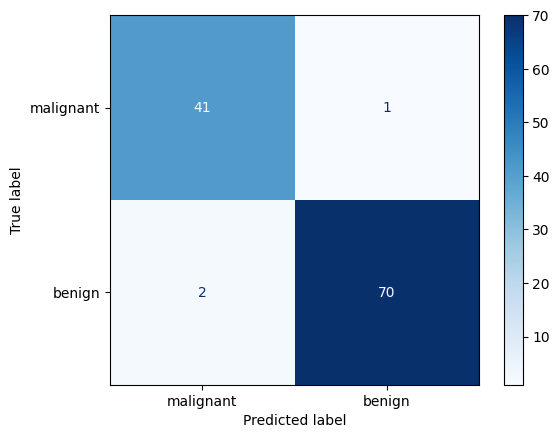

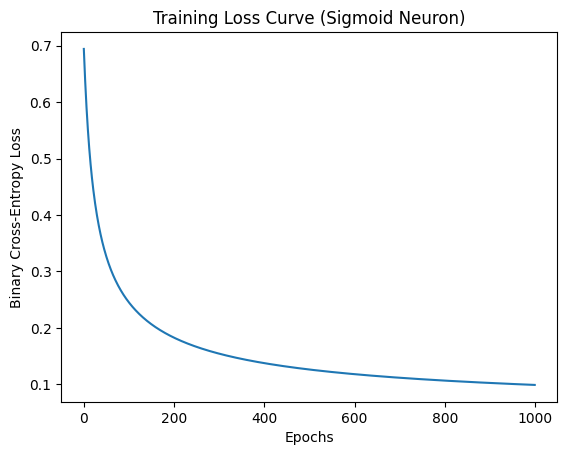

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# ------------------------------
# Load dataset
# ------------------------------
data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1, 1)  # binary labels

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------
# Sigmoid Neuron functions
# ------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    # avoid log(0)
    eps = 1e-9
    return -np.mean(y_true*np.log(y_pred+eps) + (1-y_true)*np.log(1-y_pred+eps))

# ------------------------------
# Train sigmoid neuron (logistic regression)
# ------------------------------
def train_sigmoid_neuron(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    W = np.random.randn(n, 1) * 0.01
    b = 0
    loss_history = []

    for epoch in range(epochs):
        # forward pass
        z = np.dot(X, W) + b
        y_pred = sigmoid(z)

        # compute loss
        loss = binary_cross_entropy(y, y_pred)
        loss_history.append(loss)

        # gradients
        dz = y_pred - y
        dW = np.dot(X.T, dz) / m
        db = np.sum(dz) / m

        # update
        W -= lr * dW
        b -= lr * db

    return W, b, loss_history

# Train the model
W, b, loss_history = train_sigmoid_neuron(X_train, y_train)

# ------------------------------
# Predictions
# ------------------------------
def predict(X, W, b, threshold=0.5):
    z = np.dot(X, W) + b
    probs = sigmoid(z)
    return (probs >= threshold).astype(int)

y_pred_train = predict(X_train, W, b)
y_pred_test = predict(X_test, W, b)

# Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# ------------------------------
# Confusion Matrix
# ------------------------------
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.show()

# ------------------------------
# Loss Curve
# ------------------------------
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve (Sigmoid Neuron)")
plt.show()
